In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
os.chdir("C:/Users/nisha pujari/Documents/nisha study ds/Loan Prediction")

In [3]:
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
ld_test= pd.read_csv("test.csv")
ld_train= pd.read_csv("train.csv")

In [5]:
ld_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [6]:
ld_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
ld= ld_test.append(ld_train)

In [8]:
ld.shape

(981, 13)

In [9]:
ld.Gender.value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

In [10]:
ld.Gender.isnull().sum()

24

In [11]:
ld.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,981,957,978,956,981,926,981.000000,981.000000,954.000000,961.000000,902.000000,981,614
unique,981,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001015,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,775,631,545,763,807,NaN,NaN,NaN,NaN,NaN,349,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5179.795107,1601.916330,142.511530,342.201873,0.835920,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,5695.104533,2718.772806,77.421743,65.100602,0.370553,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,9.000000,6.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2875.000000,0.000000,100.000000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3800.000000,1110.000000,126.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5516.000000,2365.000000,162.000000,360.000000,1.000000,NaN,NaN


In [12]:
ld["Gender"]=ld["Gender"].fillna(ld["Gender"].mode()[0])
ld["Gender"].isnull().sum()

0

In [13]:
ld.Married.value_counts()

Yes    631
No     347
Name: Married, dtype: int64

In [14]:
ld.Married.isnull().sum()

3

In [15]:
ld.Married.unique()

array(['Yes', 'No', nan], dtype=object)

In [16]:
pd.crosstab(ld['Married'],ld['CoapplicantIncome'])

CoapplicantIncome,0.000000,16.120001,187.000000,189.000000,240.000000,242.000000,250.000000,292.000000,296.000000,333.000000,...,10968.000000,11300.000000,11666.000000,13983.000000,14507.000000,15000.000000,20000.000000,24000.000000,33837.000000,41667.000000
Married,,,,,,,,,,,,,,,,,,,,,
No,224,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
Yes,203,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,1,0,0,0


In [17]:
pd.crosstab(ld['CoapplicantIncome'],ld['Married']).isnull().sum()

Married
No     0
Yes    0
dtype: int64

In [18]:
sns.violinplot(ld["Married"].fillna("MISSING"),ld.CoapplicantIncomeapplicantIncome)

AttributeError: 'DataFrame' object has no attribute 'CoapplicantIncomeapplicantIncome'

In [19]:
ld[ld.Married.isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [20]:
ld1=ld.copy()

In [21]:
ld1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,NaN
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,NaN
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,NaN
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,NaN,Urban,NaN
4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [22]:
ld1[ld1.Loan_ID==["LP001357"]['Married'].fillna["Yes"]]

TypeError: list indices must be integers or slices, not str

In [23]:
ld[ld.Married.isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [24]:
ld1 = ld1.rename(['228']=={'Nan':'No'})


TypeError: Index(...) must be called with a collection of some kind, False was passed

In [25]:
ld["Married"]=ld["Married"].fillna("NO")

In [26]:
ld1.Married[228]

228     No
228    NaN
Name: Married, dtype: object

In [27]:
ld["Dependents"]

0       0
1       1
2       2
3       2
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 981, dtype: object

In [28]:
ld.Dependents.nunique()

4

In [77]:
ld1.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [78]:
ld1["Dependents"]=ld1["Dependents"].apply(lambda x : str(x).replace('3+','3'))

In [79]:
ld1.Dependents.unique()

array(['0', '1', '2', '3', 'nan'], dtype=object)

In [80]:
ld.Dependents.isnull().sum()

0

In [33]:
ld.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [34]:
ld.LoanAmount.isnull().sum()

27

In [35]:
ld.ApplicantIncome.isnull().sum()

0

In [36]:
ld.CoapplicantIncome.isnull().sum()

0

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

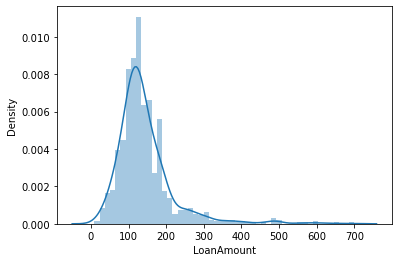

In [37]:
sns.distplot(ld["LoanAmount"])


In [38]:
ld1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,NaN
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,NaN
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,NaN
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,NaN,Urban,NaN
4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [39]:
ld1.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [40]:
ld1.Married.unique()

array(['Yes', 'No', nan], dtype=object)

In [41]:
ld1["Married"]=ld1["Married"].fillna("NO")

In [42]:
ld1["Married"]=ld1['Married'].replace(["NO"],"No")

In [43]:
ld1.Credit_History.value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [44]:
ld1.Credit_History.isnull().sum()

79

In [45]:
pd.crosstab(ld['Credit_History'],ld['Loan_Status']).isnull().sum()

Loan_Status
N    0
Y    0
dtype: int64

In [46]:
pd.crosstab(ld['Credit_History'],ld['Loan_Status'])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


In [47]:
ld1["Credit_History"]=ld1['Credit_History'].fillna(ld1['Credit_History'].groupby(ld1["Loan_Status"]).transform("mean"))

In [48]:
ld1.Credit_History.isnull().sum()

29

In [48]:
ld1["Credit_History"]=ld1["Credit_History"].fillna("0")

In [49]:
ld1["Loan_Amount_Term"].fillna(method="backfill",inplace=True)

In [50]:
ld1.Loan_Amount_Term.isnull().sum()

0

In [ ]:
loan['Self_Employed'].fillna("No",inplace=True)

In [51]:
ld1.Self_Empolyed.isnull().sum()

AttributeError: 'DataFrame' object has no attribute 'Self_Empolyed'

In [52]:
ld1.Self_Employed.value_counts()

No     807
Yes    119
Name: Self_Employed, dtype: int64

In [53]:
ld1.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [56]:
ld1.Self_Empolyed.isnull().sum()

AttributeError: 'DataFrame' object has no attribute 'Self_Empolyed'

In [57]:
ld1['Self_Employed'].fillna("No",inplace=True)

In [58]:
ld1.Self_Employed.unique()

array(['No', 'Yes'], dtype=object)

In [59]:
loan_MVT=ld1[["Loan_ID","ApplicantIncome","CoapplicantIncome","LoanAmount"]]

In [60]:
loan_MVT

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount
0,LP001015,5720,0.0,110.0
1,LP001022,3076,1500.0,126.0
2,LP001031,5000,1800.0,208.0
3,LP001035,2340,2546.0,100.0
4,LP001051,3276,0.0,78.0
...,...,...,...,...
609,LP002978,2900,0.0,71.0
610,LP002979,4106,0.0,40.0
611,LP002983,8072,240.0,253.0
612,LP002984,7583,0.0,187.0


In [62]:
train_MVT=loan_MVT[ld1.LoanAmount.notnull()]
test_MVT=loan_MVT[ld1.LoanAmount.isnull()]

In [63]:
train_MVT.shape,test_MVT.shape

((954, 4), (27, 4))

In [64]:
Y_MVT=train_MVT.LoanAmount
X_MVT=train_MVT.drop("LoanAmount",axis=1)
z_MVT=test_MVT.drop(["LoanAmount"],axis=1)

In [65]:
# Y_MVT
# X_MVT
z_MVT

,Loan_ID,ApplicantIncome,CoapplicantIncome
78,LP001415,3413,4053.0
101,LP001542,2262,0.0
188,LP002057,13083,0.0
247,LP002360,10000,0.0
289,LP002593,8333,4000.0
0,LP001002,5849,0.0
35,LP001106,2275,2067.0
63,LP001213,4945,0.0
81,LP001266,2395,0.0
95,LP001326,6782,0.0


In [66]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_MVT.drop("Loan_ID",axis=1),Y_MVT)

LinearRegression()

In [67]:
model=LR.predict(z_MVT.drop("Loan_ID",axis=1))

In [68]:
model

array([145.57328935, 108.70074963, 193.39907312, 169.26776074,
       183.71883837, 136.77697977, 123.01263737, 129.70117491,
       109.7417696 , 144.07977395, 197.8371056 , 152.04007383,
       149.31618264, 132.52239008, 122.24183637, 252.76069269,
       106.65001858, 130.11226647, 105.31939156, 136.11476346,
       169.63563997, 116.05132368, 125.08263795, 141.97459136,
       142.91351851, 126.82857045, 135.90500286])

In [69]:
ld1.loc[ld1.LoanAmount.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
78,LP001415,Male,Yes,1,Graduate,No,3413,4053.0,NaN,360.0,1.0,Semiurban,NaN
101,LP001542,Female,Yes,0,Graduate,No,2262,0.0,NaN,480.0,0.0,Semiurban,NaN
188,LP002057,Male,Yes,0,Not Graduate,No,13083,0.0,NaN,360.0,1.0,Rural,NaN
247,LP002360,Male,Yes,NaN,Graduate,No,10000,0.0,NaN,360.0,1.0,Urban,NaN
289,LP002593,Male,Yes,1,Graduate,No,8333,4000.0,NaN,360.0,1.0,Urban,NaN
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,No,6782,0.0,NaN,360.0,0.541899,Urban,N


In [70]:
ld1.loc[ld1.LoanAmount.isna(), 'LoanAmount'] = model

In [72]:
ld1.loc[63]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
63,LP001347,Female,No,0,Graduate,No,2101,1500.0,108.000000,360.0,0.0,Rural,NaN
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,129.701175,360.0,0.0,Rural,N


In [84]:
ld2.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [82]:
ld2=ld1.copy()

In [93]:
ld2

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3,Dependents_nan,Education_Not Graduate,Self_Employed_Yes,Credit_History_0.5418994413407822,Credit_History_0.9818181818181818,Credit_History_1.0,Credit_History_0,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5720,0.0,110.0,360.0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,3076,1500.0,126.0,360.0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0
2,5000,1800.0,208.0,360.0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0
3,2340,2546.0,100.0,360.0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0
4,3276,0.0,78.0,360.0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
610,4106,0.0,40.0,180.0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1
611,8072,240.0,253.0,360.0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,1
612,7583,0.0,187.0,360.0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,1


In [91]:
ld2=pd.get_dummies(ld2,drop_first=True)


In [94]:
ld1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,NaN
1,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,NaN
2,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,NaN
3,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,0,Urban,NaN
4,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [95]:
ld1.drop("Loan_Status",axis=1,inplace=True)

In [87]:
ld2.drop("Loan_ID",axis=1,inplace=True)

In [92]:
ld2

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3,Dependents_nan,Education_Not Graduate,Self_Employed_Yes,Credit_History_0.5418994413407822,Credit_History_0.9818181818181818,Credit_History_1.0,Credit_History_0,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5720,0.0,110.0,360.0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,3076,1500.0,126.0,360.0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0
2,5000,1800.0,208.0,360.0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0
3,2340,2546.0,100.0,360.0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0
4,3276,0.0,78.0,360.0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
610,4106,0.0,40.0,180.0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1
611,8072,240.0,253.0,360.0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,1
612,7583,0.0,187.0,360.0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,1


In [101]:
ld1=pd.get_dummies(ld1,drop_first=True)

In [104]:
ld2.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Gender_Male', 'Married_Yes', 'Dependents_1',
       'Dependents_2', 'Dependents_3', 'Dependents_nan',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Credit_History_0.5418994413407822',
       'Credit_History_0.9818181818181818', 'Credit_History_1.0',
       'Credit_History_0', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_Status_Y'],
      dtype='object')

In [105]:
ld1.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Gender_Male', 'Married_Yes', 'Dependents_1',
       'Dependents_2', 'Dependents_3', 'Dependents_nan',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Credit_History_0.5418994413407822',
       'Credit_History_0.9818181818181818', 'Credit_History_1.0',
       'Credit_History_0', 'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [106]:
ld.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [107]:
ld4=pd.concat([ld1,ld["Loan_Status"]],axis=1)

In [108]:
ld4

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3,Dependents_nan,Education_Not Graduate,Self_Employed_Yes,Credit_History_0.5418994413407822,Credit_History_0.9818181818181818,Credit_History_1.0,Credit_History_0,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5720,0.0,110.0,360.0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,NaN
1,3076,1500.0,126.0,360.0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,NaN
2,5000,1800.0,208.0,360.0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,NaN
3,2340,2546.0,100.0,360.0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,NaN
4,3276,0.0,78.0,360.0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Y
610,4106,0.0,40.0,180.0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,Y
611,8072,240.0,253.0,360.0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,Y
612,7583,0.0,187.0,360.0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,Y


In [98]:
ld1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3,Dependents_nan,Education_Not Graduate,Self_Employed_Yes,Credit_History_0.5418994413407822,Credit_History_0.9818181818181818,Credit_History_1.0,Credit_History_0,Property_Area_Semiurban,Property_Area_Urban
0,5720,0.0,110.0,360.0,1,1,0,0,0,0,0,0,0,0,1,0,0,1
1,3076,1500.0,126.0,360.0,1,1,1,0,0,0,0,0,0,0,1,0,0,1
2,5000,1800.0,208.0,360.0,1,1,0,1,0,0,0,0,0,0,1,0,0,1
3,2340,2546.0,100.0,360.0,1,1,0,1,0,0,0,0,0,0,0,1,0,1
4,3276,0.0,78.0,360.0,1,0,0,0,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
610,4106,0.0,40.0,180.0,1,1,0,0,1,0,0,0,0,0,1,0,0,0
611,8072,240.0,253.0,360.0,1,1,1,0,0,0,0,0,0,0,1,0,0,1
612,7583,0.0,187.0,360.0,1,1,0,1,0,0,0,0,0,0,1,0,0,1


In [57]:
ld1=pd.get_dummies(ld1,drop_first=True)

In [58]:
ld1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_0.5418994413407822,Credit_History_0.9818181818181818,Credit_History_1.0,Credit_History_0,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5720,0.0,110.0,360.0,1,1,0,0,0,0,0,0,0,1,0,0,1,0
1,3076,1500.0,126.0,360.0,1,1,1,0,0,0,0,0,0,1,0,0,1,0
2,5000,1800.0,208.0,360.0,1,1,0,1,0,0,0,0,0,1,0,0,1,0
3,2340,2546.0,100.0,360.0,1,1,0,1,0,0,0,0,0,0,1,0,1,0
4,3276,0.0,78.0,360.0,1,0,0,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
610,4106,0.0,40.0,180.0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
611,8072,240.0,253.0,360.0,1,1,1,0,0,0,0,0,0,1,0,0,1,1
612,7583,0.0,187.0,360.0,1,1,0,1,0,0,0,0,0,1,0,0,1,1


In [109]:
test_c1=ld4[ld4["Loan_Status"].isnull()]
train_c1=ld4[ld4["Loan_Status"].notnull()]

In [110]:
test_c1.isna().sum()

ApplicantIncome                        0
CoapplicantIncome                      0
LoanAmount                             0
Loan_Amount_Term                       0
Gender_Male                            0
Married_Yes                            0
Dependents_1                           0
Dependents_2                           0
Dependents_3                           0
Dependents_nan                         0
Education_Not Graduate                 0
Self_Employed_Yes                      0
Credit_History_0.5418994413407822      0
Credit_History_0.9818181818181818      0
Credit_History_1.0                     0
Credit_History_0                       0
Property_Area_Semiurban                0
Property_Area_Urban                    0
Loan_Status                          367
dtype: int64

In [111]:
train_c1.isna().sum()

ApplicantIncome                      0
CoapplicantIncome                    0
LoanAmount                           0
Loan_Amount_Term                     0
Gender_Male                          0
Married_Yes                          0
Dependents_1                         0
Dependents_2                         0
Dependents_3                         0
Dependents_nan                       0
Education_Not Graduate               0
Self_Employed_Yes                    0
Credit_History_0.5418994413407822    0
Credit_History_0.9818181818181818    0
Credit_History_1.0                   0
Credit_History_0                     0
Property_Area_Semiurban              0
Property_Area_Urban                  0
Loan_Status                          0
dtype: int64

In [112]:
test_c1.shape

(367, 19)

In [113]:
train_c1.shape

(614, 19)

In [114]:
ld4.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3,Dependents_nan,Education_Not Graduate,Self_Employed_Yes,Credit_History_0.5418994413407822,Credit_History_0.9818181818181818,Credit_History_1.0,Credit_History_0,Property_Area_Semiurban,Property_Area_Urban
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000
mean,5179.795107,1601.916330,142.551762,342.503568,0.814475,0.643221,0.163099,0.163099,0.092762,0.025484,0.222222,0.121305,0.013252,0.037717,0.768603,0.029562,0.355759,0.348624
std,5695.104533,2718.772806,76.538422,64.493911,0.388921,0.479293,0.369644,0.369644,0.290247,0.157671,0.415952,0.326648,0.114409,0.190607,0.421940,0.169461,0.478987,0.476778
min,0.000000,0.000000,9.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2875.000000,0.000000,101.000000,360.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,3800.000000,1110.000000,127.000000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [115]:
ld4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 613
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ApplicantIncome                    981 non-null    int64  
 1   CoapplicantIncome                  981 non-null    float64
 2   LoanAmount                         981 non-null    float64
 3   Loan_Amount_Term                   981 non-null    float64
 4   Gender_Male                        981 non-null    uint8  
 5   Married_Yes                        981 non-null    uint8  
 6   Dependents_1                       981 non-null    uint8  
 7   Dependents_2                       981 non-null    uint8  
 8   Dependents_3                       981 non-null    uint8  
 9   Dependents_nan                     981 non-null    uint8  
 10  Education_Not Graduate             981 non-null    uint8  
 11  Self_Employed_Yes                  981 non-null    uint8  

In [116]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()

In [121]:
model = LR.fit(train_c1.drop("Loan_Status",axis=1), train_c1.Loan_Status)

In [118]:
ld4

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3,Dependents_nan,Education_Not Graduate,Self_Employed_Yes,Credit_History_0.5418994413407822,Credit_History_0.9818181818181818,Credit_History_1.0,Credit_History_0,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5720,0.0,110.0,360.0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,NaN
1,3076,1500.0,126.0,360.0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,NaN
2,5000,1800.0,208.0,360.0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,NaN
3,2340,2546.0,100.0,360.0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,NaN
4,3276,0.0,78.0,360.0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Y
610,4106,0.0,40.0,180.0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,Y
611,8072,240.0,253.0,360.0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,Y
612,7583,0.0,187.0,360.0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,Y


In [119]:
model

LogisticRegression()

In [120]:
LR

LogisticRegression()

In [123]:
pred=model.predict(test_c1.drop("Loan_Status",axis=1))

In [124]:
pred

array(['Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y

In [125]:
pred.shape

(367,)

In [126]:
loan=pd.concat([ld_test["Loan_ID"],pd.DataFrame(pred, columns=["Loan_Status"])],axis=1)


In [127]:
loan

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,N
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,N
365,LP002986,Y


In [129]:
loan.Loan_Status.value_counts()

Y    291
N     76
Name: Loan_Status, dtype: int64

In [130]:
loan.to_csv("LR.csv")

In [ ]:
#RANDOM FOREST CLASSIFIER

In [131]:
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier(n_estimators=10,random_state=0)
regressor.fit(train_c1.drop("Loan_Status",axis=1), train_c1.Loan_Status)

RandomForestClassifier(n_estimators=10, random_state=0)

In [147]:
pred2=regressor.predict(test_c1.drop("Loan_Status",axis=1))

In [148]:
pred2

array(['Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N',
       'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y

In [149]:
loan2.Loan_Status.value_counts()

Y    291
N     76
Name: Loan_Status, dtype: int64

In [150]:
loan2=pd.concat([ld_test["Loan_ID"],pd.DataFrame(pred2, columns=["Loan_Status"])],axis=1)

In [138]:
loan2

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,N
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,N
365,LP002986,Y


In [141]:
loan2

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,N
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,N
365,LP002986,Y


In [142]:
from sklearn.naive_bayes import GaussianNB
GNB=GaussianNB()
model1 = GNB.fit(train_c1.drop("Loan_Status",axis=1), train_c1.Loan_Status)

In [143]:
pred2=model1.predict(test_c1.drop("Loan_Status",axis=1))

In [144]:
pred2

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y

In [145]:
loan3=pd.concat([ld_test["Loan_ID"],pd.DataFrame(pred2, columns=["Loan_Status"])],axis=1)

In [146]:
loan3.Loan_Status.value_counts()

Y    286
N     81
Name: Loan_Status, dtype: int64

In [151]:
loan3.to_csv("GB.csv")

In [152]:
!pip install xgboost

In [153]:
import xgboost as xgb
model5=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model5.fit(train_c1.drop("Loan_Status",axis=1), train_c1.Loan_Status)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['N' 'Y']

In [159]:
import lightgbm as lgb
clf=lgb.LGBMClassifier()
clf.fit(train_c1.drop("Loan_Status",axis=1), train_c1.Loan_Status)

LGBMClassifier()

In [157]:
pip install lightgbm

In [160]:
pred5=clf.predict(test_c1.drop("Loan_Status",axis=1))

In [161]:
pred5

array(['Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y

In [162]:
loan5=pd.concat([ld_test["Loan_ID"],pd.DataFrame(pred5, columns=["Loan_Status"])],axis=1)

In [163]:
loan5

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,N
365,LP002986,Y


In [164]:
loan5.to_csv("GBM.csv")

In [165]:
loan5.Loan_Status.value_counts()

Y    252
N    115
Name: Loan_Status, dtype: int64